## Import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import ttest_ind

In [ ]:
pd.set_option('display.max_columns', None)

## Read Data

In [2]:
df = pd.read_csv('../dataset/PhiUSIIL_Phishing_URL_Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [74]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [79]:
df.duplicated().sum()

np.int64(0)

##### Insights:
- no missing and dup data, don't need handle

## Univariate Analysis

In [11]:
# get the numerical vs categorical columns
# connvert those where theres only 0 and 1 to boolean
for col in df.columns:
    if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}:
        df[col] = df[col].astype('bool')
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()
text_cols = df.select_dtypes(include=['object']).columns.tolist()

In [6]:
# describe the numerical columns
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
NoOfObfuscatedChar,235795.0,0.024861,1.876249,0.000000,0.000000,0.000000,0.000000,4.470000e+02
ObfuscationRatio,235795.0,0.000138,0.003817,0.000000,0.000000,0.000000,0.000000,3.480000e-01


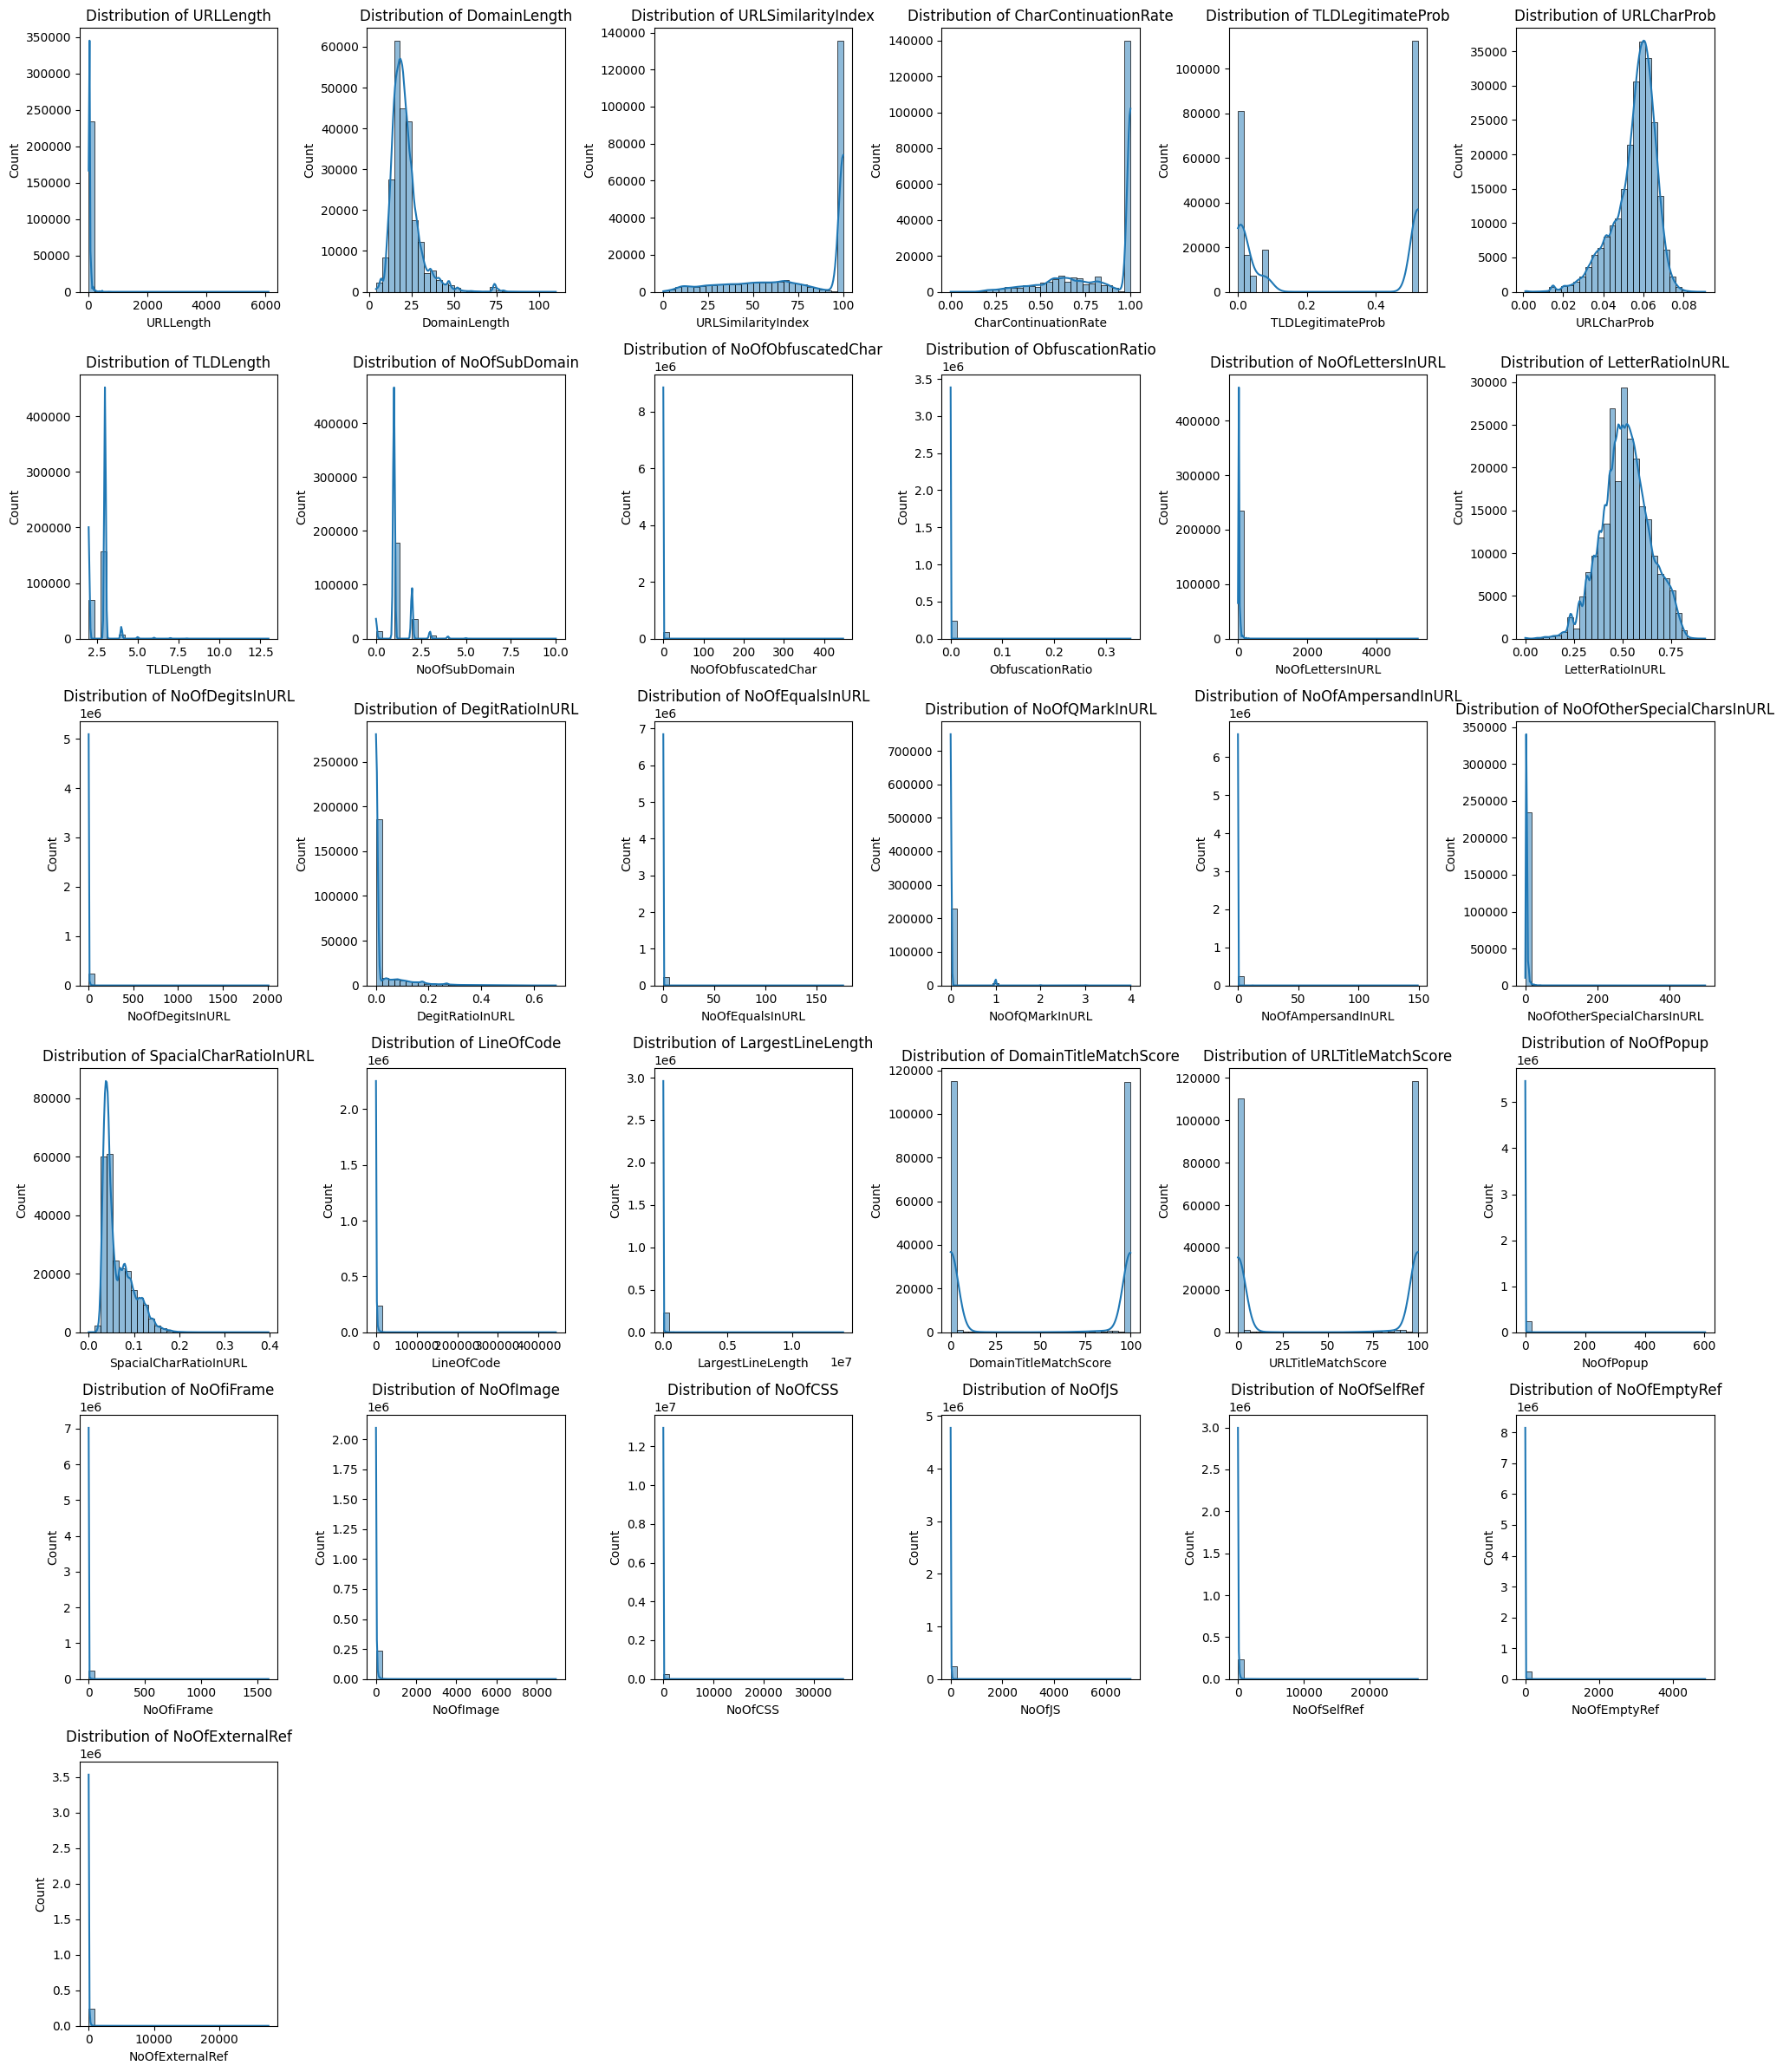

In [ ]:
# hist of numerical columns
n_cols = 6
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


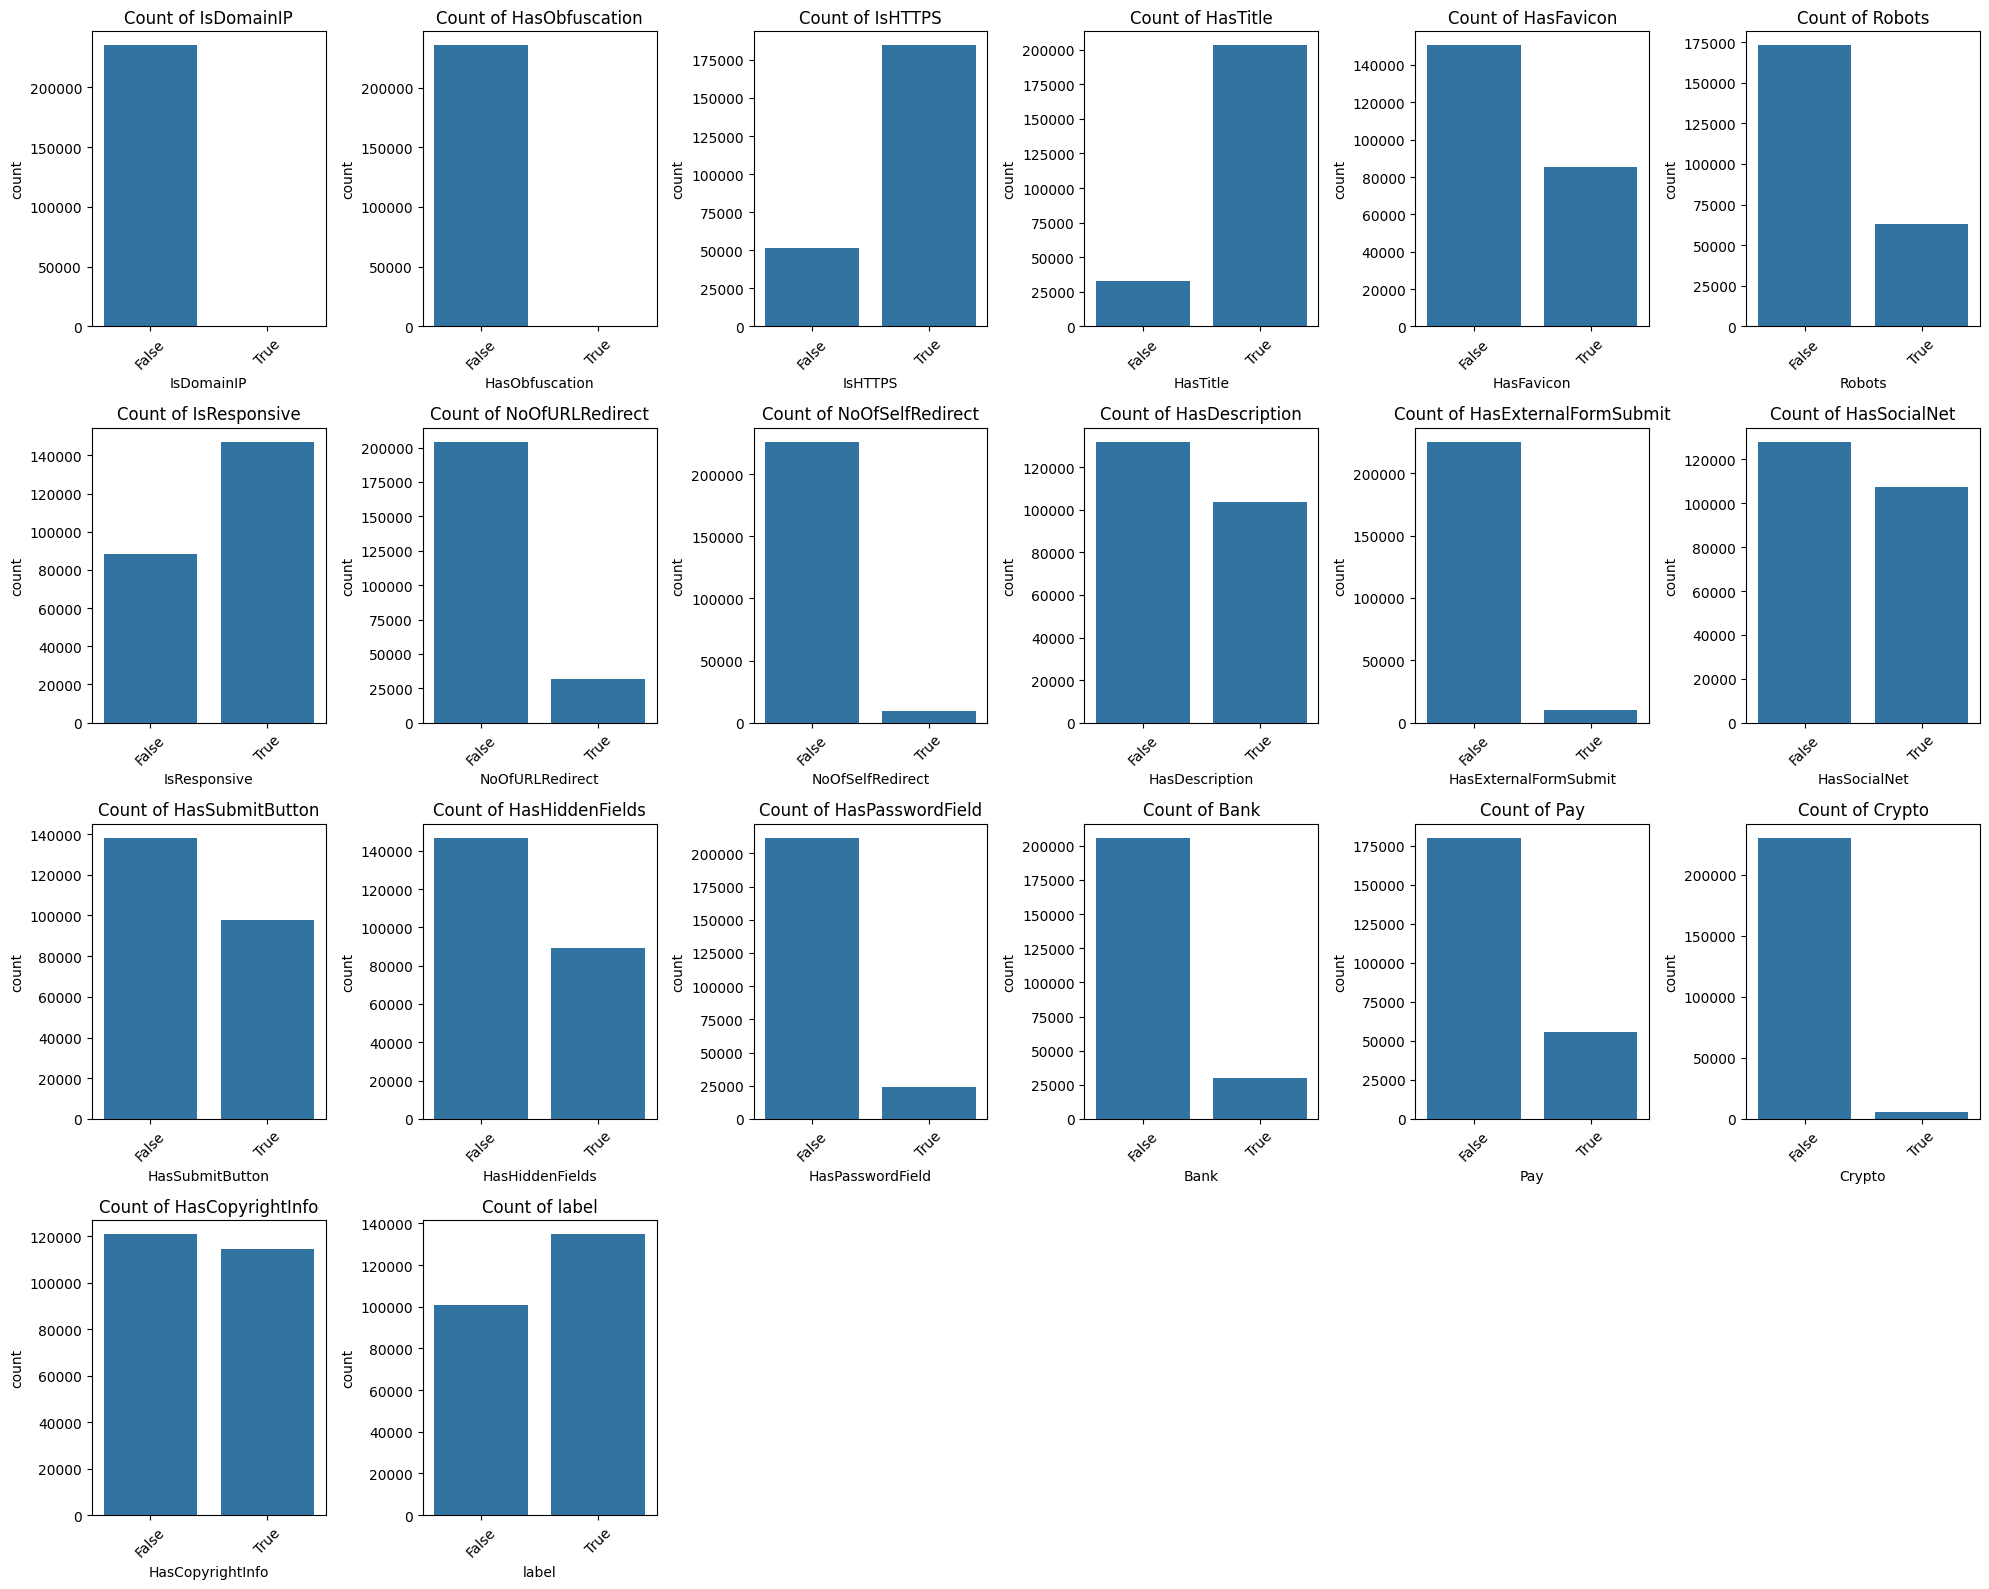

In [7]:
# count plot for boolean columns
n_cols = 6
n_rows = math.ceil(len(boolean_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(boolean_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)  

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Correlation Analysis

Skipping URLSimilarityIndex: zero variance in at least one label group -> {False: 36360, True: 1}
Skipping NoOfObfuscatedChar: zero variance in at least one label group -> {False: 20, True: 1}
Skipping ObfuscationRatio: zero variance in at least one label group -> {False: 146, True: 1}
Skipping NoOfEqualsInURL: zero variance in at least one label group -> {False: 25, True: 1}
Skipping NoOfQMarkInURL: zero variance in at least one label group -> {False: 5, True: 1}
Skipping NoOfAmpersandInURL: zero variance in at least one label group -> {False: 31, True: 1}


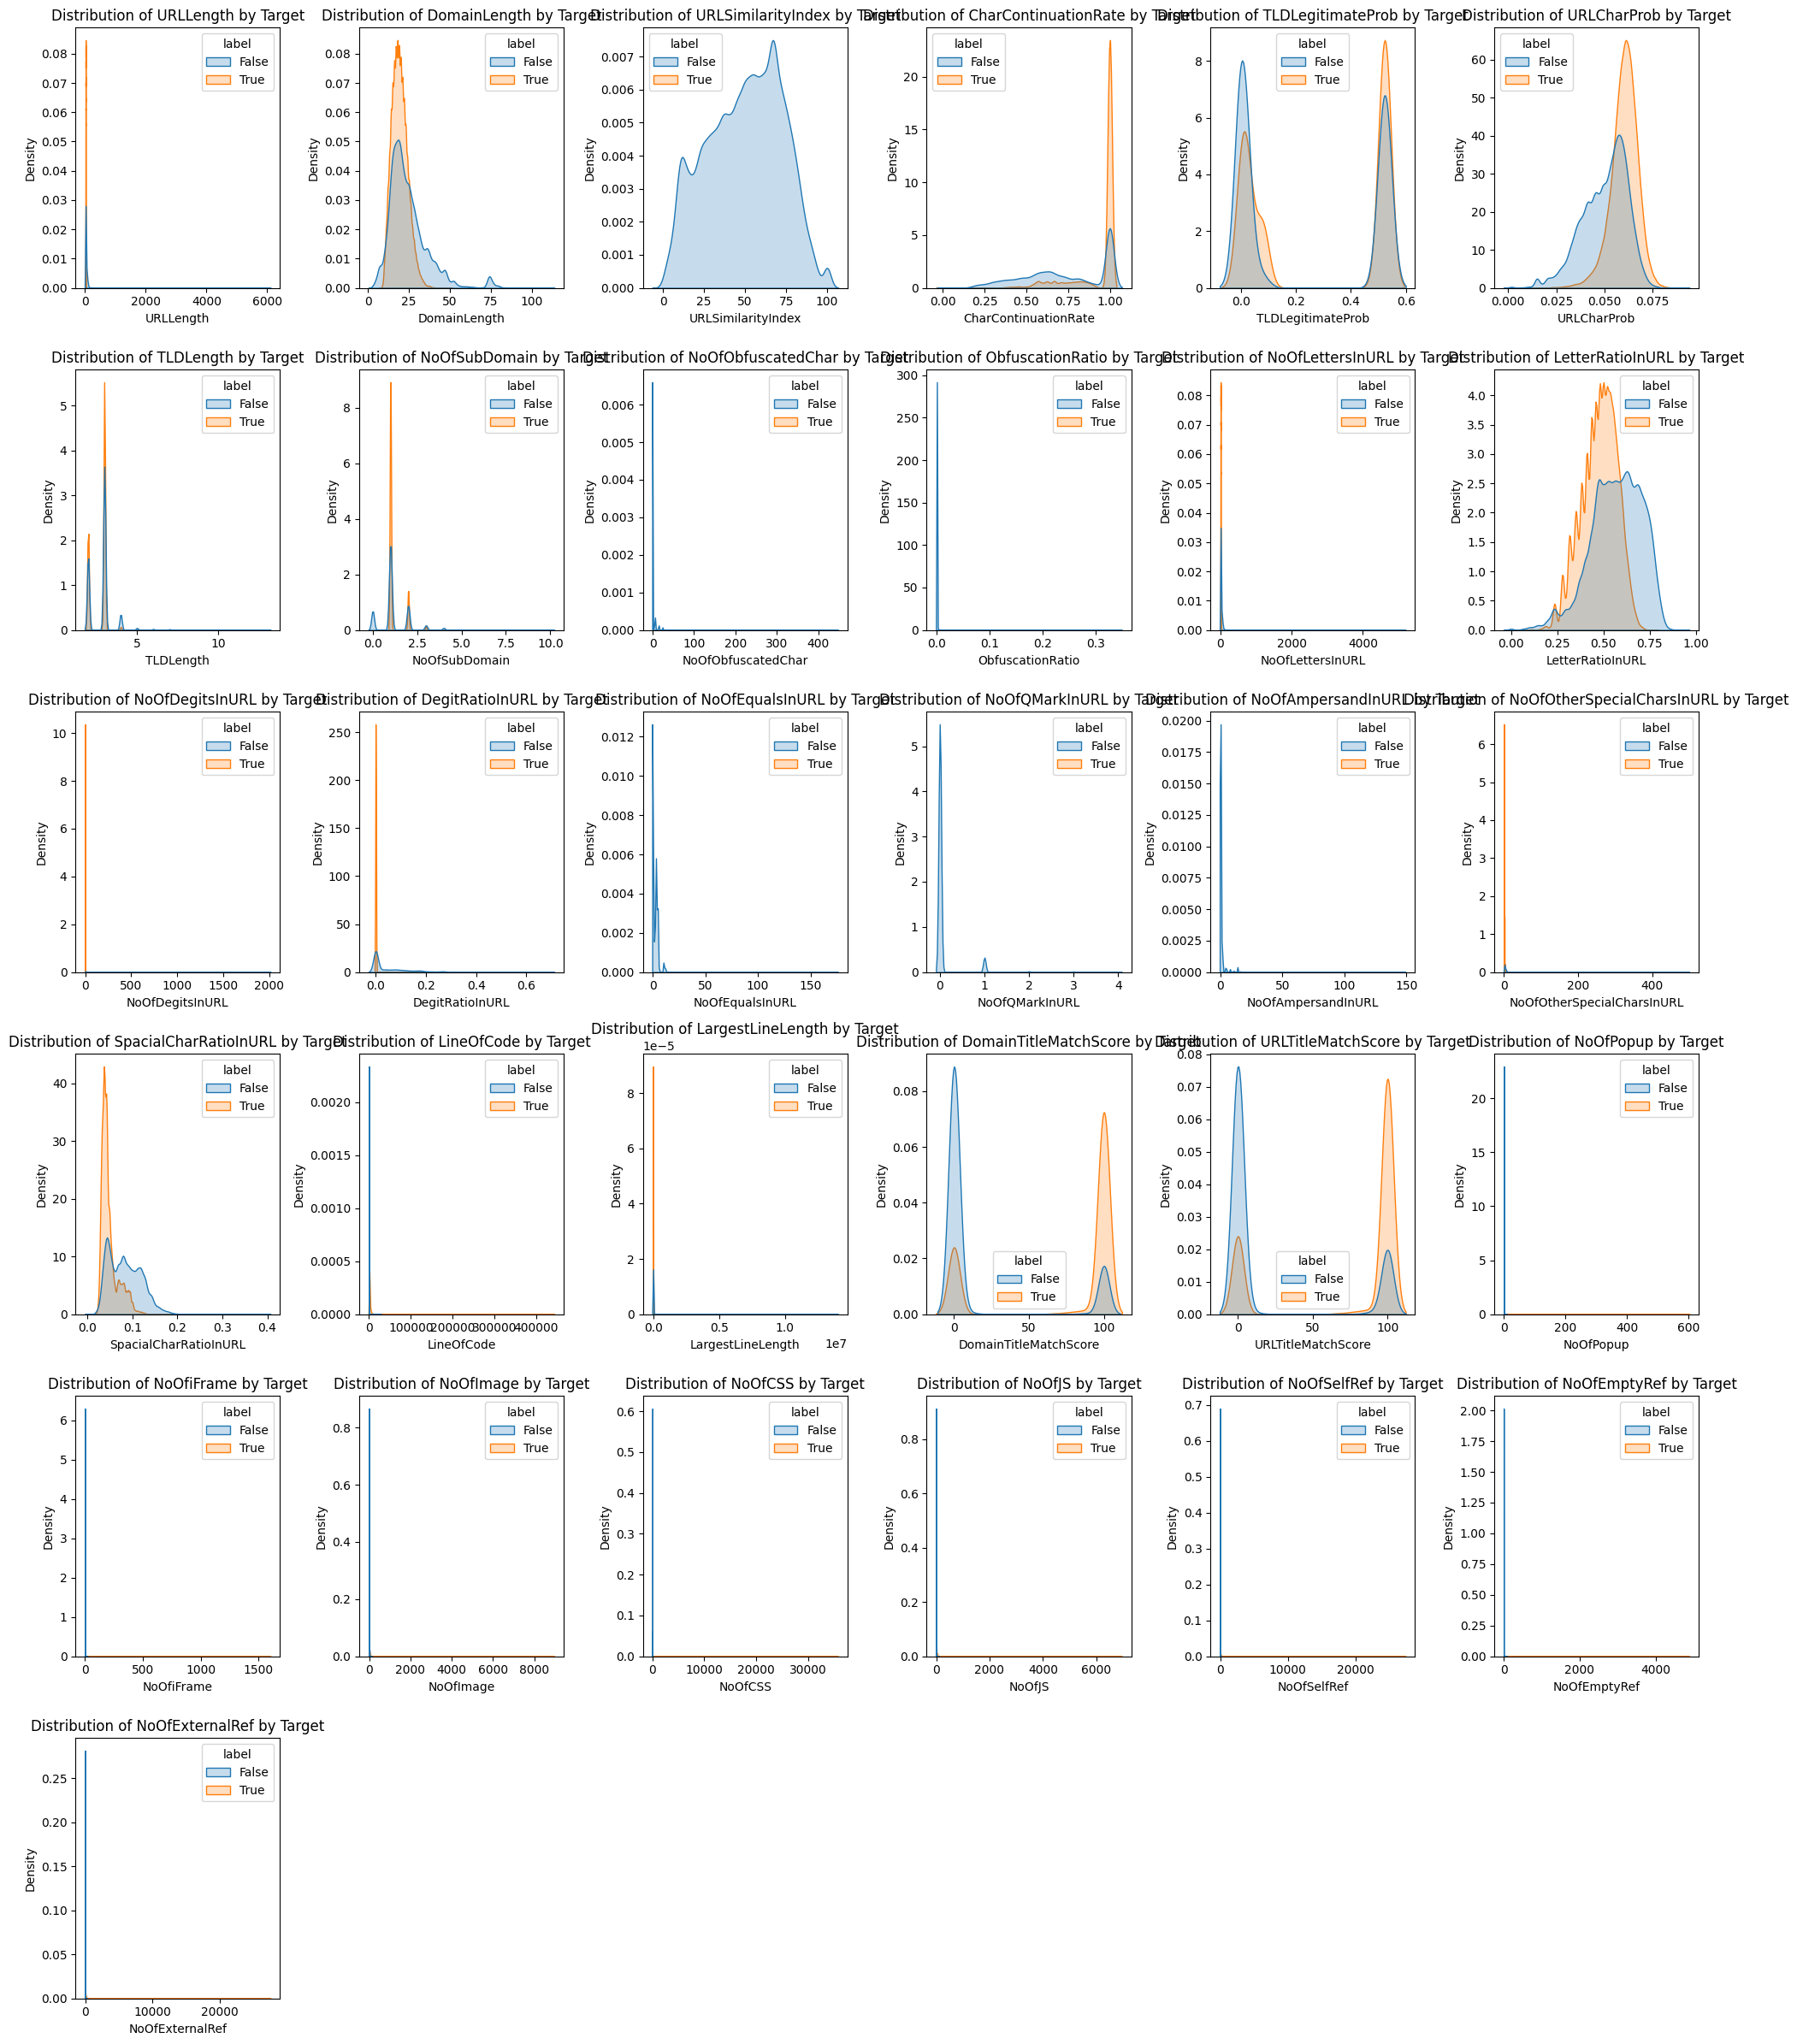

In [26]:
# kde of numerical columns grouped by target
n_cols = 6
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    group_variances = df.groupby("label")[col].nunique()
    if (group_variances <= 1).any():  # if any group has only 1 unique value
        print(f"Skipping {col}: zero variance in at least one label group -> {group_variances.to_dict()}")
        sns.kdeplot(data=df, x=col, hue='label', ax=axes[i], fill=True, warn_singular=False)
        axes[i].set_title(f'Distribution of {col} by Target')
    else:
        sns.kdeplot(data=df, x=col, hue='label', ax=axes[i], fill=True, common_norm=False)
        axes[i].set_title(f'Distribution of {col} by Target')


# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

##### Insights:
- `URLSimilarityIndex`, `NoOfObfuscatedChar`, `ObfuscationRatio`, `NoOfEqualsInURL`, `NoOfQMarkInURL`, `NoOfAmpersandInURL` only have 1 unique value in the positive label class
- `DomainTitleMatchScore`, `URLTitleMatchScore`, `TLDLegitimateProb` seems to be bimodal where each class dominates one peak, which suggests these are good predictors

In [27]:
cols_to_check = [
    "URLSimilarityIndex", "NoOfObfuscatedChar", "ObfuscationRatio",
    "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL"
]

for col in cols_to_check:
    summary = df.groupby("label")[col].agg(["nunique", "mean", "std", "count"])
    print(f"\n=== {col} ===")
    print(summary)



=== URLSimilarityIndex ===
       nunique        mean        std   count
label                                        
False    36360   49.616973  22.572082  100945
True         1  100.000000   0.000000  134850

=== NoOfObfuscatedChar ===
       nunique      mean       std   count
label                                     
False       20  0.058071  2.867251  100945
True         1  0.000000  0.000000  134850

=== ObfuscationRatio ===
       nunique      mean       std   count
label                                     
False      146  0.000323  0.005829  100945
True         1  0.000000  0.000000  134850

=== NoOfEqualsInURL ===
       nunique      mean       std   count
label                                     
False       25  0.145386  1.424329  100945
True         1  0.000000  0.000000  134850

=== NoOfQMarkInURL ===
       nunique      mean      std   count
label                                    
False        5  0.068681  0.29115  100945
True         1  0.000000  0.00000  134850



In [34]:
from sklearn.metrics import roc_auc_score

for col in cols_to_check:
    try:
        auc = roc_auc_score(df["label"], df[col])
        print(f"{col}: AUC = {auc:.3f}")
    except Exception as e:
        print(f"{col}: skipped ({e})")


URLSimilarityIndex: AUC = 0.996
NoOfObfuscatedChar: AUC = 0.498
ObfuscationRatio: AUC = 0.498
NoOfEqualsInURL: AUC = 0.473
NoOfQMarkInURL: AUC = 0.470
NoOfAmpersandInURL: AUC = 0.496


##### Insights:
- Univariate classification power refers to the discriminatory ability of a single predictor (variable) to predict a binary outcome measured by AUC. AUC > 0.5 and closer to 1 suggest high predictive power.
- In this case, `URLSimilarityIndex` has a very high AUC but looks quite suspicious, need to conduct further check to see if is real predictor of possibly caused by a leakage

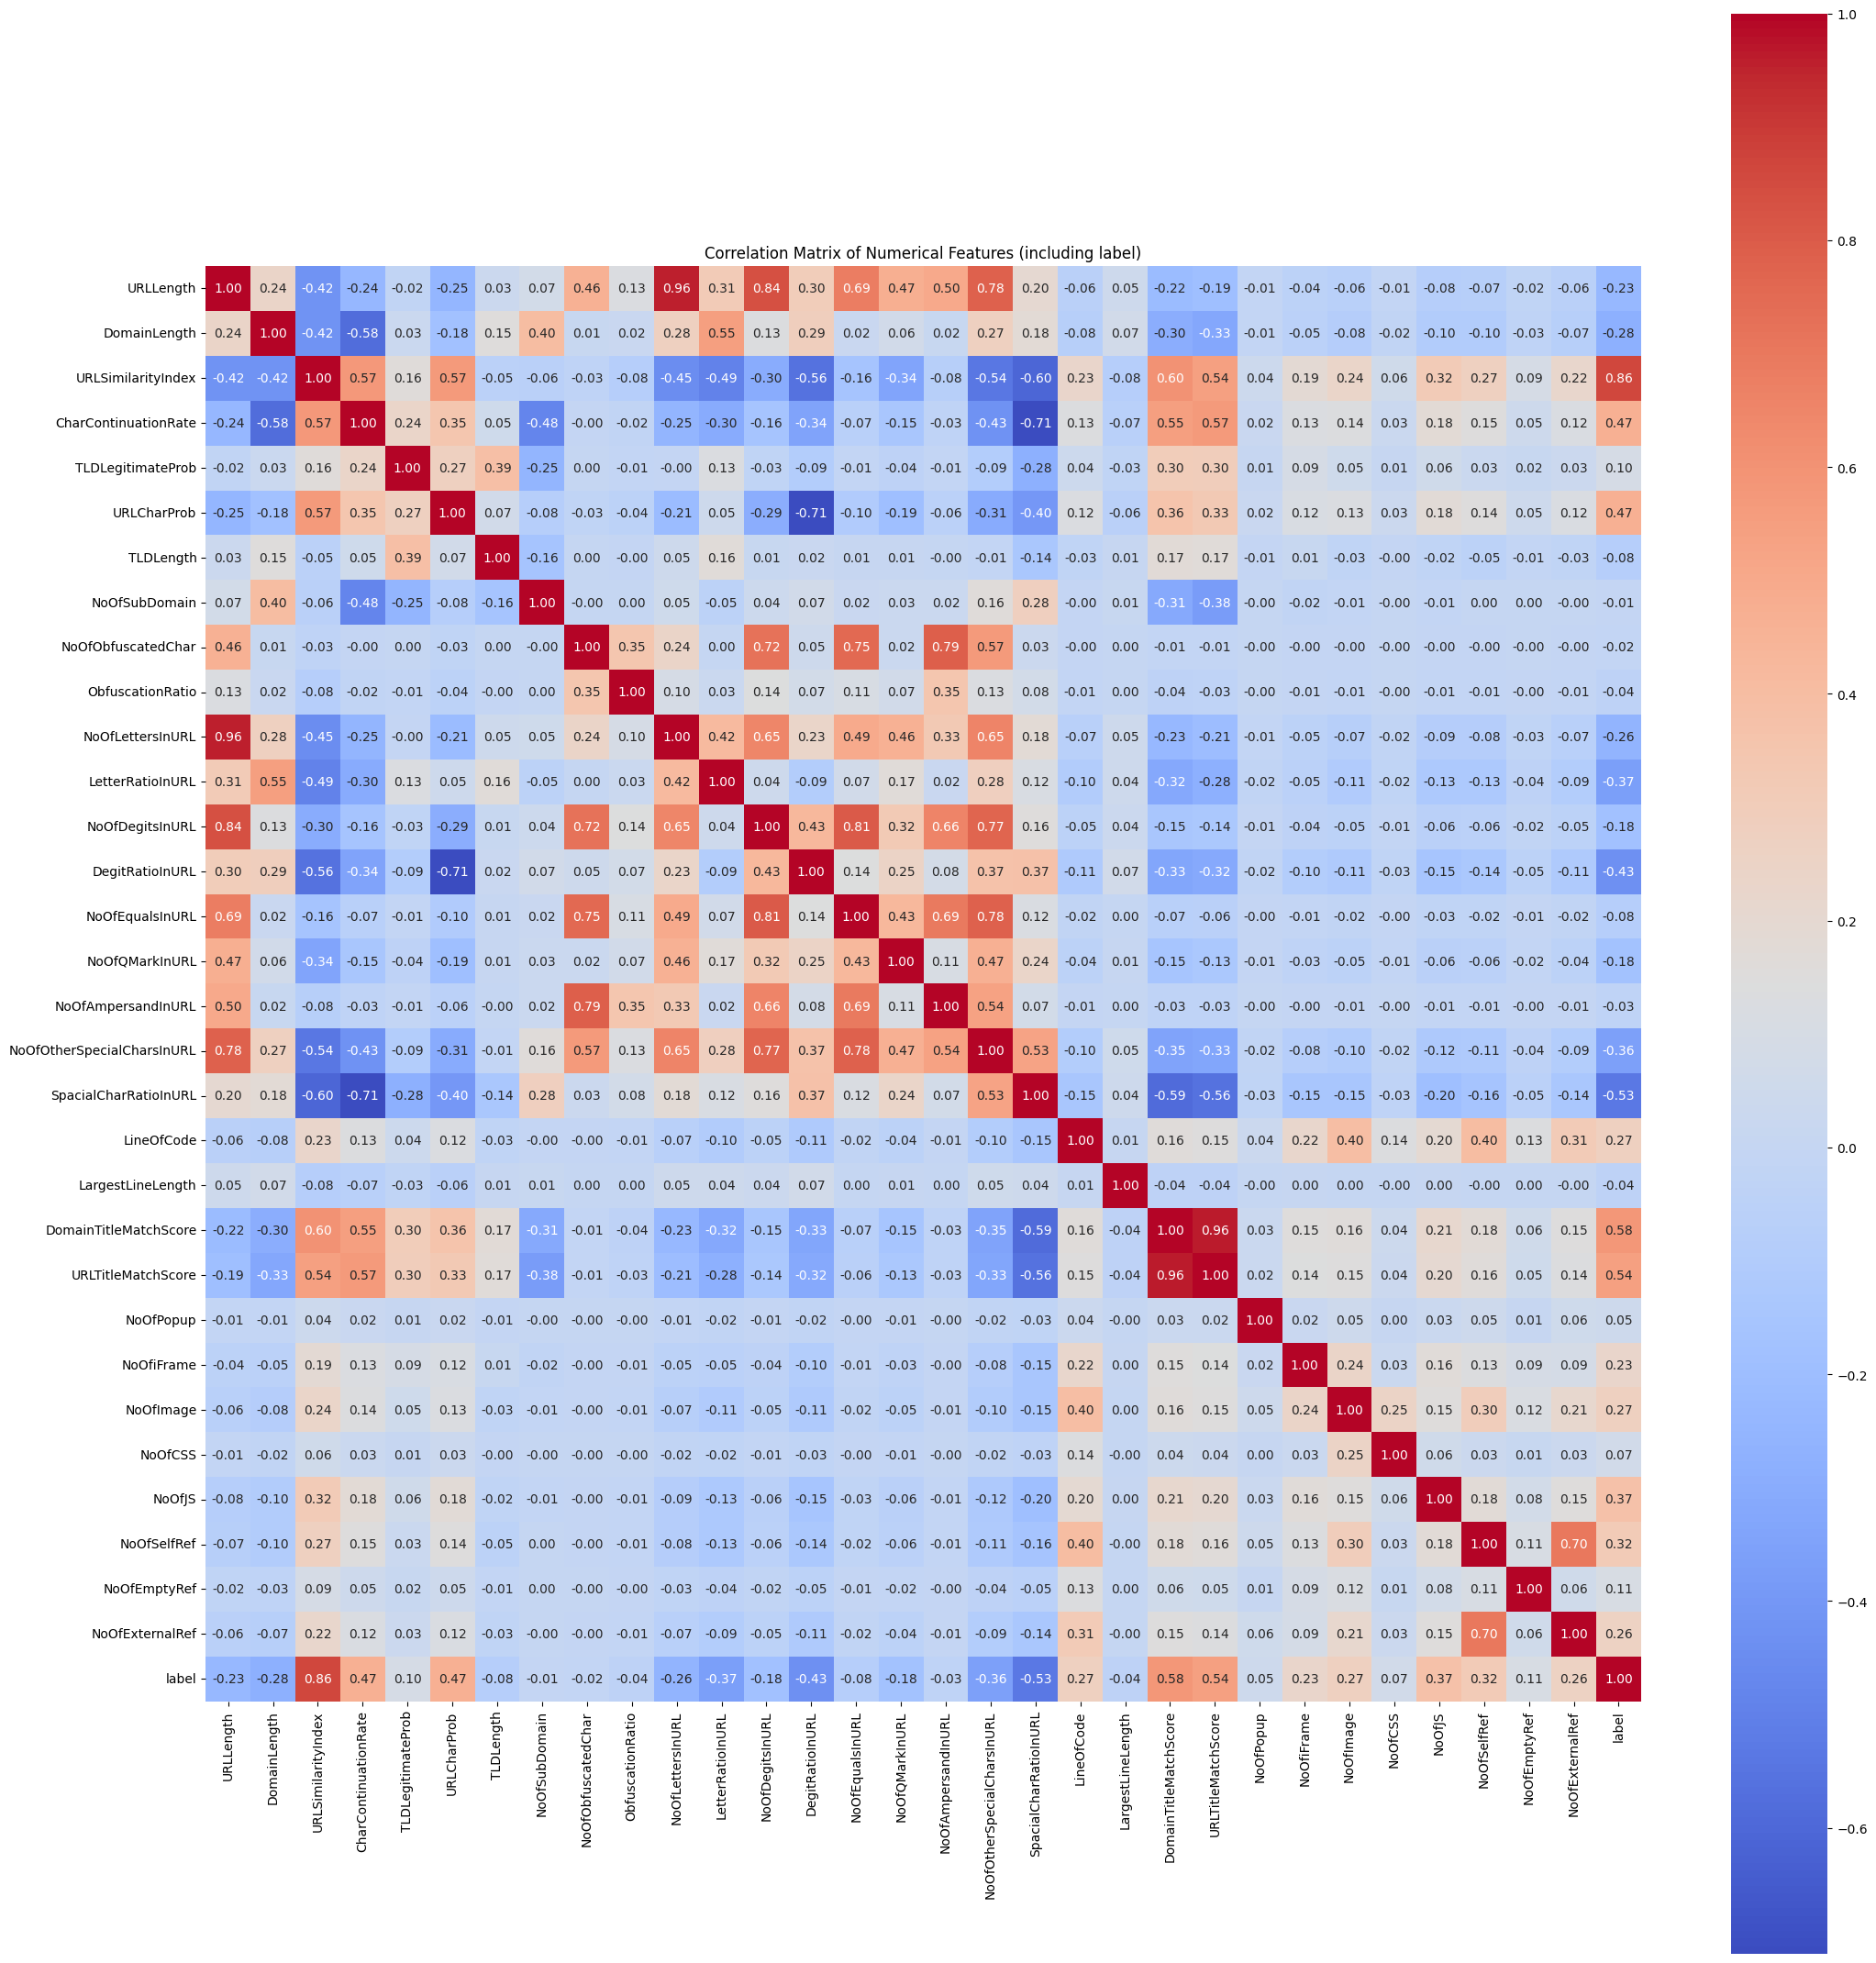

In [43]:
# correlation between numerical columns, including label
plt.figure(figsize=(22, 22))
corr = df[numerical_cols + ['label']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features (including label)')
plt.tight_layout()
plt.show()

##### Insights:
- `URLSimilarityIndex` is highly correlated with label (0.86) thus the high AUC we obtained earlier suggesting it might be good predictor suggests that it could be because
- `NoOfLettersinURL` highly correlated with `URLLength` (0.96), thus can remove one

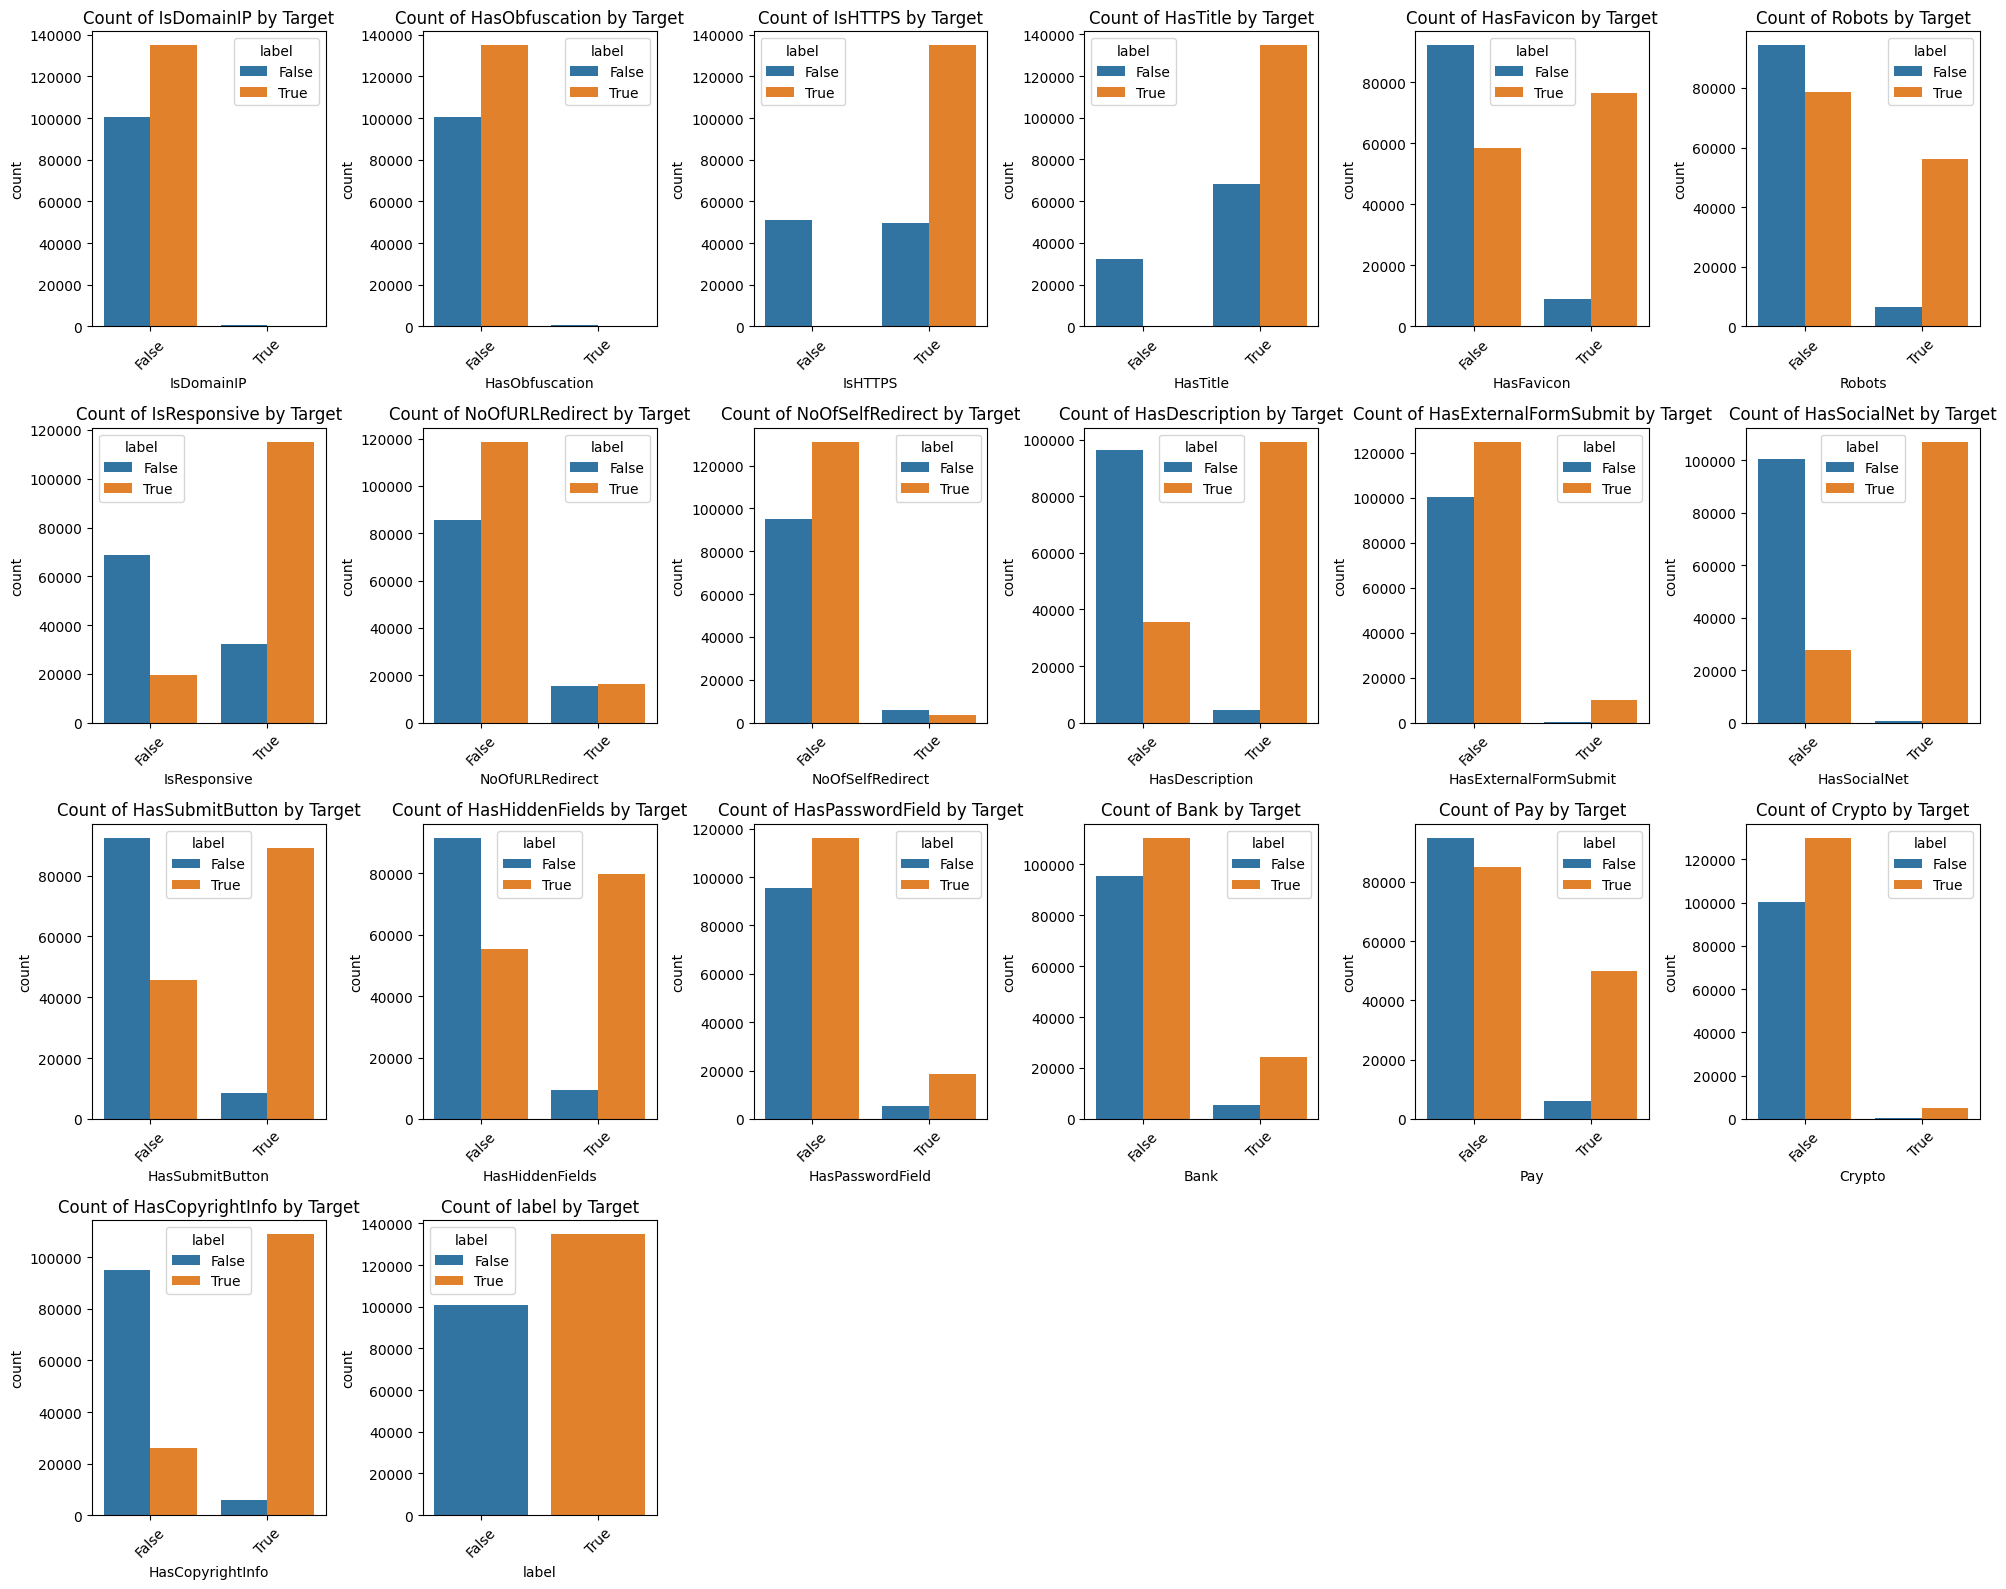

In [44]:
# count of plot of boolean columns grouped by target
n_cols = 6
n_rows = math.ceil(len(boolean_cols) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()   
for i, col in enumerate(boolean_cols):
    sns.countplot(data=df, x=col, hue='label', ax=axes[i])
    axes[i].set_title(f'Count of {col} by Target')
    axes[i].tick_params(axis='x', rotation=45)
# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

In [57]:
# print out columns where there is only 1 unique label in either group
for col in boolean_cols:
    group_variances = df.groupby("label")[col].nunique()
    if (group_variances <= 1).any():  # if any group has only 1 unique label
        print(f"{col}: zero variance in at least one group -> {group_variances.to_dict()}")

IsDomainIP: zero variance in at least one group -> {False: 2, True: 1}
HasObfuscation: zero variance in at least one group -> {False: 2, True: 1}
IsHTTPS: zero variance in at least one group -> {False: 2, True: 1}
label: zero variance in at least one group -> {False: 1, True: 1}


##### Insights:
- `IsDomainIP`, `HasObfuscation`, `IsHTTPS` might not be realistic variables to keep given that there is at least one group with a fixed label. Eg. If IsHTTPS = False then label is always False (scam), but this implies if HTTP = phishing site which is not realistic in real world as it’s possible to have legitimate HTTP sites, e.g., small blogs or intranet sites thus model may not generalise to completely unseen data 

^ not sure about this

## Looking at Text Cols

In [71]:
df[text_cols].head(50)

,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina
5,23107.txt,https://www.globalreporting.org,www.globalreporting.org,org,gri - home
6,23034.txt,https://www.saffronart.com,www.saffronart.com,com,0
7,696732.txt,https://www.nerdscandy.com,www.nerdscandy.com,com,nerds candy
8,739255.txt,https://www.hyderabadonline.in,www.hyderabadonline.in,in,hyderabadonline - business listing in hyderaba...
9,14486.txt,https://www.aap.org,www.aap.org,org,home


##### Insights:
- `FILENAME`has no meaning, can be removed, unless we have access to the txt files? and can use it to generate more features

In [66]:
# plot the count of TLD
df['TLD'].value_counts()

TLD
com      112554
org       18793
net        7097
app        6508
uk         6395
          ...  
47            1
sharp         1
faith         1
243           1
ne            1
Name: count, Length: 695, dtype: int64

## Feature Engineering Ideas

##### Domain

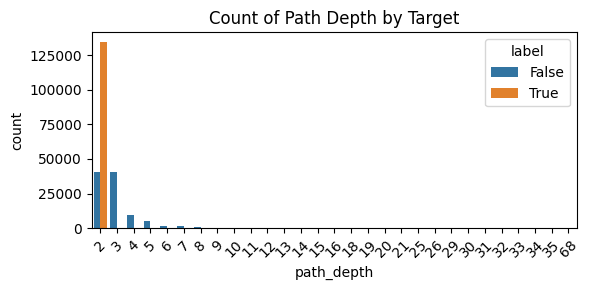

In [ ]:
# path depth (number of / in URL) -> phishing URLs often have an unusually long path. 
df['path_depth'] = df['URL'].apply(lambda x: x.count('/'))

# plot path depth split by label, treat as discrete variable
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='path_depth', hue='label')
plt.title('Count of Path Depth by Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

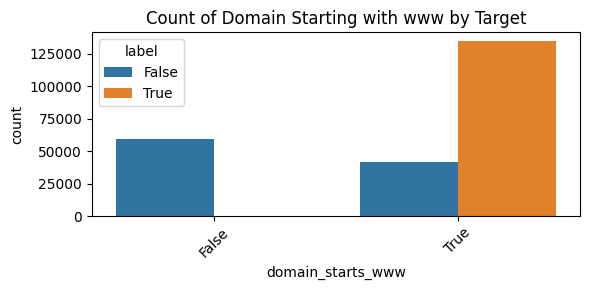

In [ ]:
# domain start www -> legit URLs often start with WWW
df['domain_starts_www'] = df['Domain'].apply(lambda x: str(x).startswith('www.'))

# plot domain_starts_www split by label, show value counts in plot
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='domain_starts_www', hue='label')

plt.title('Count of Domain Starting with www by Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# might not be realistic as feature

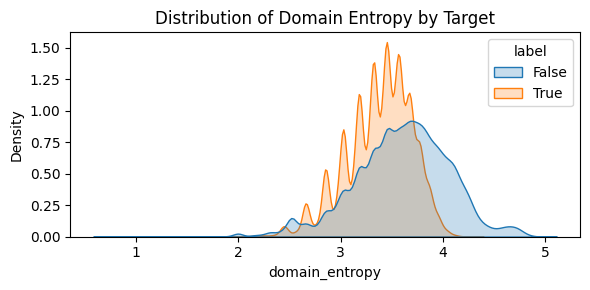

In [ ]:
# entropy of domain -. phishing URLs might have higher entropy due to randomness
def calculate_entropy(s):
    if not s:
        return 0
    prob = [float(s.count(c)) / len(s) for c in set(s)]
    entropy = -sum([p * math.log2(p) for p in prob])
    return entropy

df['domain_entropy'] = df['Domain'].apply(calculate_entropy)  

# plot kde of domain_entropy grouped by label
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df, x='domain_entropy', hue='label', fill=True, common_norm=False)
plt.title('Distribution of Domain Entropy by Target')
plt.tight_layout()
plt.show()

In [ ]:
# try some NLP technique on the domain, tokenize it and see if there are any patterns or specific keywords that are more common in phishing sites